## **Simple CNN, NO IMAGE AUGMENTATION**

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

training_cats_dir = os.path.join(train_dir, 'cats')
training_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid') ])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 1e-4),
              metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                                                  train_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
                                                            validation_dir,
                                                            target_size = (150, 150),
                                                            batch_size = 20,
                                                            class_mode = 'binary')

history = model.fit(
                    train_generator,
                    steps_per_epoch = 100,      # 2000 images = batch_size * steps
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50,      # 1000 images = batch_size * steps
                    verbose = 2)

--2021-07-12 09:26:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 74.125.137.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  76.3MB/s    in 0.9s    

2021-07-12 09:26:20 (76.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 40s - loss: 0.6905 - accuracy: 0.5290 - val_loss: 0.6675 - val_accuracy: 0.5850
Epoch 2/100
100/100 - 8s - loss: 0.6620 - accuracy: 0.6035 - val_loss: 0.6580 - val_accuracy: 0.5570
Epoch 3/100
100/100 - 8s - loss: 0.6232 - accuracy: 0.6470 - val_loss: 0.6021 - val_accuracy: 0.6770
Epoch 4/100
100/100 - 8s - loss: 0.5753 - accuracy: 0.6815 - val_loss: 0.5902 - val_accuracy: 0.6720
Epoch 5/100
100/100 - 8s - loss: 0.5526 - accuracy: 0.7190 - val_loss: 0.5815 - val_accuracy: 0.6900
Epoch 6/100
100/100 - 8s - loss: 0.5262 - accuracy: 0.7435 - val_loss: 0.5601 - val_accuracy: 0.7060
Epoch 7/100
100/100 - 8s - loss: 0.5033 - accuracy: 0.7500 - val_loss: 0.5684 - val_accuracy: 0.7120
Epoch 8/100
100/100 - 8s - loss: 0.4771 - accuracy: 0.7605 - val_loss: 0.5534 - val_accuracy: 0.7150
Epoch 9/100
100/100 - 8s - loss: 0.4549 - accuracy: 0.7685 - val_loss: 0.5484 - val_accuracy: 0.7170
Epoch 

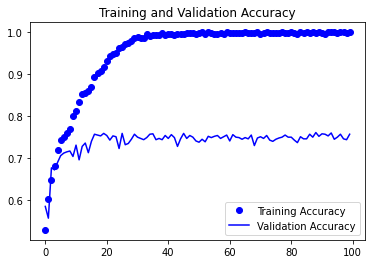

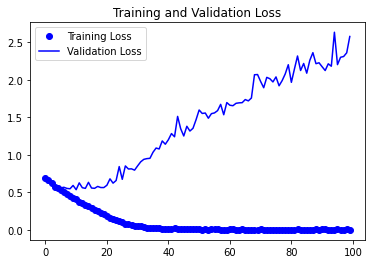

In [4]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# **WITH IMAGE AUGMENTATION**

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

training_cats_dir = os.path.join(train_dir, 'cats')
training_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid') ])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 1e-4),
              metrics = ['accuracy'])

train_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                rotation_range = 50,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                shear_range = 0.3,
                                zoom_range = 0.3,
                                horizontal_flip = True,
                                fill_mode = 'nearest')

# train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                                                  train_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
                                                            validation_dir,
                                                            target_size = (150, 150),
                                                            batch_size = 20,
                                                            class_mode = 'binary')

history = model.fit(
                    train_generator,
                    steps_per_epoch = 100,      # 2000 images = batch_size * steps
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50,      # 1000 images = batch_size * steps
                    verbose = 2)

--2021-07-12 09:47:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  65.6MB/s    in 1.0s    

2021-07-12 09:47:17 (65.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.6925 - accuracy: 0.5110 - val_loss: 0.6756 - val_accuracy: 0.5670
Epoch 2/100
100/100 - 16s - loss: 0.6795 - accuracy: 0.5680 - val_loss: 0.6542 - val_accuracy: 0.6410
Epoch 3/100
100/100 - 16s - loss: 0.6610 - accuracy: 0.5970 - val_loss: 0.6323 - val_accuracy: 0.6470
Epoch 4/100
100/100 - 16s - loss: 0.6381 - accuracy: 0.6265 - val_loss: 0.6111 - val_accuracy: 0.6780
Epoch 5/100
100/100 - 16s - loss: 0.6349 - accuracy: 0.6385 - val_loss: 0.5940 - val_accuracy: 0.6720
Epoch 6/100
100/100 - 16s - loss: 0.6220 - accuracy: 0.6560 - val_loss: 0.5835 - val_accuracy: 0.6800
Epoch 7/100
100/100 - 16s - loss: 0.6135 - accuracy: 0.6600 - val_loss: 0.6112 - val_accuracy: 0.6470
Epoch 8/100
100/100 - 16s - loss: 0.6005 - accuracy: 0.6745 - val_loss: 0.5660 - val_accuracy: 0.6980
Epoch 9/100
100/100 - 16s - loss: 0.6007 - accuracy: 0.6725 - val_loss: 0.5743 - val_accuracy: 0.693

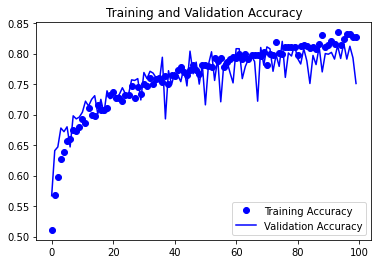

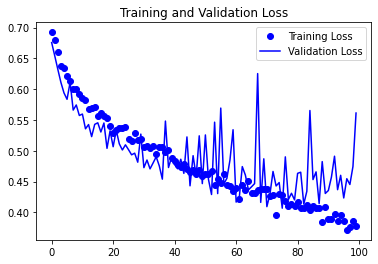

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# **TRANSFER LEARNING WITH IMAGE AUGMENTATION**

In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

training_cats_dir = os.path.join(train_dir, 'cats')
training_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# CREATING MODEL
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)


#COMPILING MODEL
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 1e-4),
              metrics = ['accuracy'])

train_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                rotation_range = 50,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                shear_range = 0.3,
                                zoom_range = 0.3,
                                horizontal_flip = True,
                                fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
                                                  train_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
                                                            validation_dir,
                                                            target_size = (150, 150),
                                                            batch_size = 20,
                                                            class_mode = 'binary')

history = model.fit(
                    train_generator,
                    steps_per_epoch = 100,      # 2000 images = batch_size * steps
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50,      # 1000 images = batch_size * steps
                    verbose = 2)

--2021-07-12 11:14:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   314MB/s    in 0.2s    

2021-07-12 11:14:15 (314 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.3845 - accuracy: 0.8275 - val_loss: 0.4161 - val_accuracy: 0.8140
Epoch 2/100
100/100 - 17s - loss: 0.3840 - accuracy: 0.8245 - val_loss: 0.4076 - val_accuracy: 0.8220
Epoch 3/100
100/100 - 17s - loss: 0.3910 - accuracy: 0.8260 - val_loss: 0.4076 - val_accuracy: 0.8140
Epoch 4/100
100/100 - 16s - loss: 0.3846 - accuracy: 0.8290 - val_loss: 0.3972 - val_accuracy: 0.8190
Epoch 5/100
100/100 - 16s - loss: 0.3744 - accuracy: 0.8300 - val_loss: 0.4068 - val_accuracy: 0.8200
Epoch 6/100
100/100 - 16s - loss: 0.3621 - accuracy: 0.8320 - val_loss: 0.4150 - val_accuracy: 0.8160
Epoch 7/100
100/100 - 16s - loss: 0.3762 - accuracy: 0.8280 - val_loss: 0.4831 - val_accuracy: 0.8050
Epoch 8/100
100/100 - 16s - loss: 0.3852 - accuracy: 0.8290 - val_loss: 0.4305 - val_accuracy: 0.8180
Epoch 9/100
100/100 - 16s - loss: 0.3591 - accuracy: 0.8445 - val_loss: 0.4452 - val_accuracy: 0.792

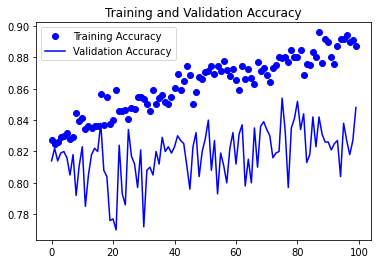

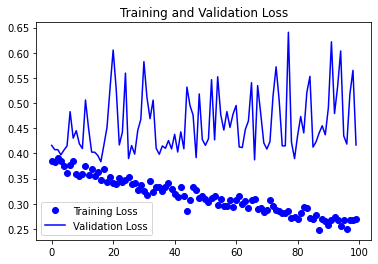

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()